#Exec Master| Apprentissage non supervisé



---


*Cette  séance pratique a un double but :* 
1. * continuer à vous vous familiariser avec les librairies de calcul scientifique, de gestion de données et de Machine Learning sous Python*
2. *vous faire manipuler quelques algorithmes d'apprentissage supervisé : Réduction de dimensionalité, Analyse sémantique latente, Clustering* 



---


##Quelques références utiles :

1. [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)
2. [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)
3. [Documentation MatPlotLib](http://matplotlib.org/)
4. [Site scikit-learn](http://scikit-learn.org/stable/index.html)
5. [Site langage python](https://www.python.org/)


##Avant goût : l'ACP avec les mains et manipulation de numpy et de MatPlotLib

On importe la libraire numpy



In [4]:
import numpy as np

On créé une matrice de taille 3x3 :

$X=\begin{bmatrix}1 &0&  0\\0& 0& 1\\
0& 1& 2\\
2 &2& 1\\
1 &0& 0\\
2 &3& 2\end{bmatrix}$

Il s'agit de 6 individus svivant dans l'espace $\mathbb{R}^3$, c'est à dire que chacun est décrit par trois caractéristiques réelles.




In [11]:
X = np.array([
    [1, 0, 0], [0, 0, 1],  [0,1,2], [2,2,1], [1,0,0], [2,3,2]
])
print(X)
#On affiche le centre de gravité
print(X.mean(axis=0))
# On centre le nuage de points
Y=X-X.mean(axis=0)
print(Y)

[[1 0 0]
 [0 0 1]
 [0 1 2]
 [2 2 1]
 [1 0 0]
 [2 3 2]]
[1. 1. 1.]
[[ 0. -1. -1.]
 [-1. -1.  0.]
 [-1.  0.  1.]
 [ 1.  1.  0.]
 [ 0. -1. -1.]
 [ 1.  2.  1.]]


On affiche le nuage de points grâce à MatPlotLib

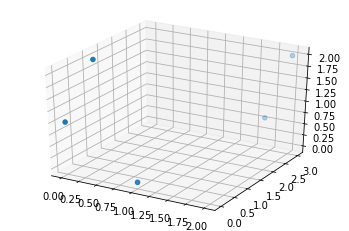

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])



A partir des données centrées, $Y$, on calcule la matrice de variance-covariance :
$C=1/n Y^t Y$



In [12]:
C=1/6*Y.transpose().dot(Y)
print(C)

[[0.66666667 0.66666667 0.        ]
 [0.66666667 1.33333333 0.66666667]
 [0.         0.66666667 0.66666667]]


On calcule la décomposition en valeurs propres de C :
$$
C=VWV^t
$$
avec V la matrice des vecteurs propres, et W une matrice diagonale constituée des vecteurs propres.

In [14]:
from numpy import linalg as LA

w, v = LA.eig(C)

print(v)

[[-4.08248290e-01  7.07106781e-01  5.77350269e-01]
 [-8.16496581e-01 -2.98081030e-16 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01  5.77350269e-01]]


On projete le nuage de points sur les deux premiers axes factoriel

In [16]:
Y_r=Y.dot(v[:,[0,1]])
print(Y_r)

[[ 1.22474487e+00  7.07106781e-01]
 [ 1.22474487e+00 -7.07106781e-01]
 [-3.88578059e-16 -1.41421356e+00]
 [-1.22474487e+00  7.07106781e-01]
 [ 1.22474487e+00  7.07106781e-01]
 [-2.44948974e+00 -2.22044605e-16]]


In [17]:
print(w)

[2.00000000e+00 6.66666667e-01 1.22216099e-16]


On affiche le nuage projeté

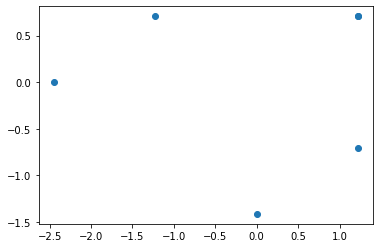

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Y_r[:,0],Y_r[:,1])

##ACP avec Scikit-Learn

*Le but ici est de vous faire manipuler la librairie phare du Machine Learning*

Créons un nuage de 200 points, en 2D cette fois-ci :

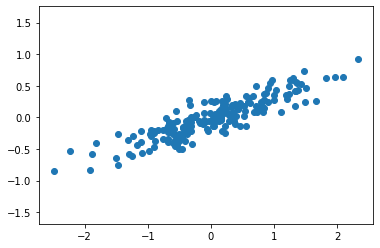

In [19]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Par inspection visuelle, il apparait clairment qu'il existe une relation linéaire entre les deux caractérstiques (penser au lien avec la régression). En ce sens, une caractéristique encode l'autre, et il n'est nullement besoin de garder les deux.

Essayons d'utiliser la fonction PCA de ScikitLearn. Je vous invite à consulter la document sur le lien mentionné en début de fichier.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

fit apprend plusieurs informations sur les données, les plus importantes sont  "components" et "explained variance":

In [21]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [22]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Pour comprendre ce que signifient ces nombres, visualisons-les sous forme de vecteurs sur les données d'entrée, en utilisant les "composants" pour définir la direction du vecteur et la "variance expliquée" pour définir la longueur au carré du vecteur:

[(-3.0, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

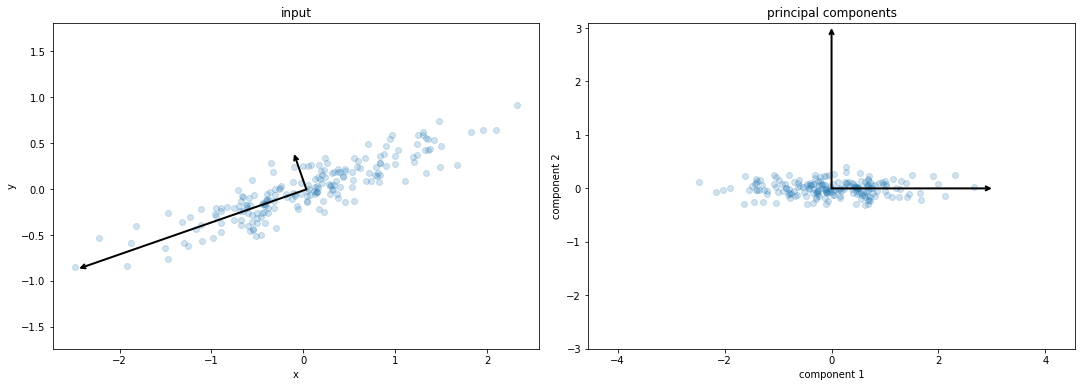

In [23]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))


##Exemple : EigenFaces

On va illustrer ici l'utilisation de l'ACP dans l'espace des images tel que abordé dans le cours.

In [24]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Jetons un coup d'œil aux  axes principaux qui couvrent cet ensemble de données. Comme il s’agit d’un jeu de données volumineux, nous utiliserons l'option "Randomized" de la fonction PCA, qui code une méthode aléatoire pour approcher les 𝑁 composantes principales beaucoup plus rapidement que l’estimateur ACP standard. Elle est donc très utile pour les données de grande dimension (ici, une dimensionnalité de 3 000). Nous allons examiner les 150 premiers composants:

In [25]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',n_components=150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

Dans ce cas, il peut être intéressant de visualiser les images associées aux  premiers composants principaux (ces composants étant techniquement appelés "eigen vecotore", ces types d'images sont donc souvent appelées "eigenfaces"). 

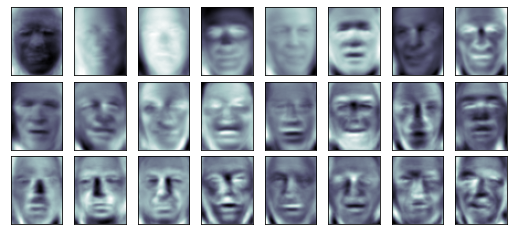

In [26]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Les résultats sont très intéressants et donnent une idée de la variation des images: par exemple, les  premières eigenfaces (en haut à gauche) semblent être associées à l’angle d’éclairage sur le visage, et les autres  axes principaux  semblent choisir certaines caractéristiques, telles que les yeux, le nez et les lèvres. Examinons la variance cumulée de ces composants pour voir quelle quantité d'informations de données préservée par la projection:

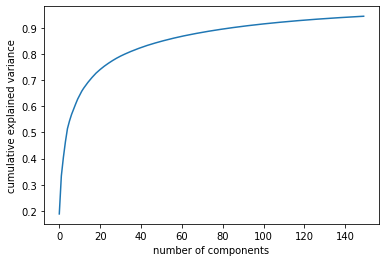

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Nous constatons que ces 150 composantes représentent un peu plus de 90% de la variance. Cela nous porte à croire qu'en utilisant ces 150 composants, nous récupérerions la plupart des caractéristiques essentielles des données. Pour rendre cela plus concret, nous pouvons comparer les images d'entrée avec les images reconstruites à partir de ces 150 composants:

In [28]:
# Compute the components and projected faces
pca = PCA(svd_solver='randomized',n_components=150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

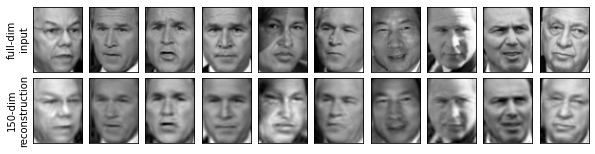

In [29]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

La rangée supérieure montre les images d'entrée, tandis que la rangée inférieure montre la reconstruction des images à partir de seulement 150 des quelque 3 000 caractéristiques initiales.

##Analyse Sémantique Latente
* Le but de cet exercice est de vous introduire au textmining en manipulant scikit-learn, panda, etc. 

Comme d'habitude on commence par importer les librairies que l'on va utiliser.

In [30]:
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd

On créé un petit corpus avec 4 documents

In [31]:
corpus = ["dog cat mouse",
"hamster mouse sushi",
"dog monster monster",
          "dog mouse dog"]

Calcul de la matrice termes-documents


In [32]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
#La classe CountVectorizer convertit une collection de coument en une matrice d'occurence
help(vectorizer)


Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------
 |  input : string {'filename', 'file', 'content'}
 |      If 'filename', the sequence passed as an argument to fit is
 |      expected to be a list of filenames that need reading to fetch
 |      the raw content to analyze.
 |  
 |      If 'file', the sequence items must have a 'read' method (file-like
 |      object) that is called to fe

In [35]:
dtm = vectorizer.fit_transform(corpus)
pd.DataFrame(dtm.toarray(),index=corpus,columns=vectorizer.get_feature_names
()).head(10)

,cat,dog,hamster,monster,mouse,sushi
dog cat mouse,1,1,0,0,1,0
hamster mouse sushi,0,0,1,0,1,1
dog monster monster,0,1,0,2,0,0
dog mouse dog,0,2,0,0,1,0


Affichage des noms des caractéristiques

In [36]:
vectorizer.get_feature_names()

['cat', 'dog', 'hamster', 'monster', 'mouse', 'sushi']

On applique la SVD
$$
X=U\Sigma V^t
$$
En ne retenant que 2 vectuers singuliers.
Notez que l'on utilise pour la première fois la notion de pipeline, qui vous sera très utile par la suite.


In [37]:
svd = TruncatedSVD(2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

dtm_lsa= lsa.fit_transform(dtm)


#Création d'un Datafrance pour affichage
LSA_space=pd.DataFrame(svd.components_,index = ["component_1","component_2"],columns =
vectorizer.get_feature_names())

In [38]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.9184822350509395,
  0.527666550745013,
  0.6741374495290507,
  0.9787052777115441],
 [-0.39546224079655284,
  -0.8494515943977389,
  0.7386059159947655,
  -0.20527050294567303])

On affiche les documents dans l'espace sémantique

Populating the interactive namespace from numpy and matplotlib


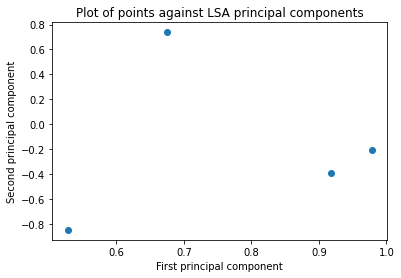

In [45]:
# Plot scatter plot of points
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
show()

Populating the interactive namespace from numpy and matplotlib


ValueError: ignored

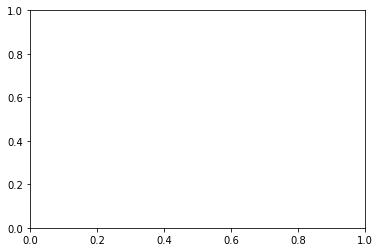

In [46]:
# Plot scatter plot of points with vectors
%pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
plt.draw()
plt.show()

Calcul de la similarité en documents

In [44]:
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=corpus, columns=vectorizer.get_feature_names()).head(10)

ValueError: ignored

###Question : 
Calculer la similarité entre caractéristiques. Qu'est ce que vous pouvez en conclure ?

##Clustering et Textmining

L'exercice ici est différent, le code vous est fourni, et c'est à vous d'expliquer ce que fait chaque ligne.

In [47]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np




# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset "
      "using a sparse vectorizer")
t0 = time()

vectorizer = TfidfVectorizer(max_df=0.5, max_features=20,
                                 min_df=2, stop_words='english',
                                 use_idf=False)
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

n_components = 5
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

print("done in %fs" % (time() - t0))

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
int(explained_variance * 100)))

print()


# #############################################################################
# Do the actual clustering


km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=False)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()



print("Top terms per cluster:")

    
original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
    
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories

Extracting features from the training dataset using a sparse vectorizer
done in 0.783186s
n_samples: 3387, n_features: 20

done in 0.801858s
Explained variance of the SVD step: 46%

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=False)
done in 0.014s

Homogeneity: 0.122
Completeness: 0.126
V-measure: 0.124
Adjusted Rand-Index: 0.070
Silhouette Coefficient: 0.357

Top terms per cluster:
Cluster 0: university article don know just people like god think does
Cluster 1: com article don posting like just know host nntp people
Cluster 2: posting host nntp university article know just like does don
Cluster 3: space nasa just article like university time think posting host
